In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy.io
import torch

from sklearn.model_selection import train_test_split

In [2]:
dsads = scipy.io.loadmat('dsads.mat')
dsads_df = pd.DataFrame(dsads['data_dsads'])
dsads_df

,0,1,2,3,4,5,6,7,8,9,...,398,399,400,401,402,403,404,405,406,407
0,0.18159,0.001289,0.97740,0.001202,0.92034,0.002124,0.60417,0.18159,0.001110,0.001035,...,0.75574,0.078302,0.008801,0.000857,0.000414,0.24269,0.047526,1.0,1.0,1.0
1,0.18186,0.000961,0.97901,0.000642,0.94172,0.001493,0.57292,0.18186,0.000792,0.000812,...,0.75162,0.079341,0.007009,0.001376,0.000779,0.46658,0.271820,2.0,1.0,1.0
2,0.18171,0.000528,0.99120,0.000466,0.93672,0.000539,0.61458,0.18171,0.000407,0.000345,...,0.74650,0.074646,0.005282,0.001151,0.000368,0.18409,0.028531,3.0,1.0,1.0
3,0.18173,0.001531,0.98364,0.001466,0.93766,0.001969,0.58333,0.18173,0.001251,0.001172,...,0.69563,0.087227,0.009425,0.000855,0.000282,0.18788,0.027360,4.0,1.0,1.0
4,0.18147,0.000815,0.98862,0.000720,0.93724,0.000945,0.54167,0.18147,0.000586,0.000560,...,0.72342,0.090580,0.007176,0.000837,0.000469,0.17299,0.009971,5.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,0.25498,0.200280,0.17550,0.171840,0.16525,0.214420,0.31250,0.25498,0.194040,0.185950,...,0.59518,0.305240,0.058193,0.018280,0.018077,0.47559,0.184140,56.0,19.0,8.0
9116,0.23673,0.236460,0.22461,0.312540,0.21149,0.343500,0.32292,0.23673,0.192350,0.226760,...,0.60633,0.318200,0.061667,0.068837,0.068688,0.54715,0.264890,57.0,19.0,8.0
9117,0.22536,0.275810,0.14131,0.129050,0.13306,0.176410,0.27083,0.22536,0.182110,0.412670,...,0.43880,0.467390,0.157620,0.077912,0.136620,0.77629,0.612430,58.0,19.0,8.0
9118,0.24748,0.296470,0.10928,0.441270,0.10290,0.471970,0.22917,0.24748,0.236460,0.233160,...,0.58933,0.349810,0.076063,0.024648,0.031143,0.60312,0.333290,59.0,19.0,8.0


In [96]:
pamap = scipy.io.loadmat('pamap.mat')
pamap_df = pd.DataFrame(pamap['data_pamap'])
pamap_df.head()

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,-0.985865,-0.943370,-0.392865,-0.971917,-0.392865,-0.944107,-0.440860,-0.985865,-0.955370,-0.966996,...,0.194576,0.148544,-0.600225,-0.966178,-0.975980,-0.994310,-0.493846,-0.705221,1.0,1.0
1,-0.980813,-0.939876,-0.392865,-0.967848,-0.392865,-0.940120,-0.562724,-0.980813,-0.949874,-0.958106,...,0.296708,0.112212,-0.613984,-0.966956,-0.977905,-0.996659,-0.943339,-0.992864,1.0,1.0
2,-0.981071,-0.923581,-0.415095,-0.953571,-0.415095,-0.923974,-0.555556,-0.981071,-0.928253,-0.941826,...,-0.304042,0.264640,-0.348350,-0.932341,-0.917266,-0.923750,0.556087,0.362490,1.0,1.0
3,-0.980063,-0.924217,-0.415124,-0.953380,-0.415124,-0.923784,-0.448029,-0.980063,-0.930109,-0.939370,...,-0.737156,-0.347023,0.060504,-0.626389,-0.023482,0.061547,0.441436,0.205478,1.0,1.0
4,-0.981735,-0.958505,-0.415124,-0.953380,-0.084243,-0.923784,-0.354839,-0.981735,-0.967207,-0.975581,...,-0.678535,-0.257434,-0.010541,-0.697847,-0.053474,-0.287784,-0.306239,-0.739722,1.0,1.0


In [8]:
def split_df(df, user_col, exclude=[]):
    inside = df[~df.iloc[:, user_col].isin(exclude)]
    outside = df[df.iloc[:, user_col].isin(exclude)]
    return inside, outside

def drop_cols(df, cols=[]):
    return df.drop(columns=cols)

def to_pickle(df, class_col, name):
    X = df.iloc[:, :class_col].to_numpy()
    y = df.iloc[:, class_col].to_numpy()
    pickle.dump({'X': X, 'y': y}, open(name, 'wb'))

def to_tensor(df, class_col):
    # data = {
    #     'data': [
    #         [
    #             768_dimension_of_ViT_embedding,
    #             the_label
    #         ],
    #         [],
    #         ...
    #     ],
    #     'targets': labels/classes as a whole
    # }
    X = df.iloc[:, :class_col].to_numpy()
    y = df.iloc[:, class_col].to_numpy()
    y_map = {v: k for k, v in enumerate(np.unique(y))}
    y = torch.tensor(np.vectorize(y_map.get)(y)).type(torch.int)
    data = [[torch.tensor(x_, dtype=torch.float), y_] for x_, y_ in zip(X, y)]
    # torch.save({'data': data, 'targets': targets}, name)
    return {'data': data, 'targets': y}

def make(df, user_col, exclude, drop=None):
    inside, outside = split_df(df, user_col, exclude)
    inside = drop_cols(inside, [user_col])
    outside = drop_cols(outside, [user_col])

    if drop:
        inside = drop_cols(inside, drop)
        outside = drop_cols(outside, drop)

    train_data = to_tensor(inside, len(inside.columns)-1)
    test_data = to_tensor(outside, len(inside.columns)-1)
    # to_pickle(inside, class_col, train_name)
    # to_pickle(outside, class_col, test_name)
    # return inside, outside
    return train_data, test_data






#pamap user_col: 244, class_col: 243
# make(pamap_df, 244, 243, [1.0, 7.0], 'pamap_train1_7.pkl', 'pamap_test1_7.pkl')
# make(pamap_df, 244, 243, [1.0, 4.0], 'pamap_train1_4.pkl', 'pamap_test1_4.pkl')
# make(pamap_df, 244, 243, [1.0, 7.0], 'pamap_train1_7.pth', 'pamap_test1_7.pth')
# make(pamap_df, 244, 243, [1.0, 4.0], 'pamap_train1_4.pth', 'pamap_test1_4.pth')

#dsads user_col: 406, class_col: 405
# make(dsads_df, 406, 405, [1.0, 7.0], 'dsads_train1_7.pkl', 'dsads_test1_7.pkl')
# make(dsads_df, 406, 405, [1.0, 4.0], 'dsads_train1_4.pkl', 'dsads_test1_4.pkl')
# make(dsads_df, 406, 405, [1.0, 7.0], 'dsads_train1_7.pth', 'dsads_test1_7.pth')
# make(dsads_df, 406, 405, [1.0, 4.0], 'dsads_train1_4.pth', 'dsads_test1_4.pth')

In [11]:
agents = dsads_df.iloc[:, 407].unique()
test_agent = np.random.choice(agents, 2, replace=False)
train_agent = np.setdiff1d(agents, test_agent)
print(train_agent, test_agent)
train_set, test_set = make(dsads_df, user_col=407, exclude=test_agent.tolist(), drop=405)
print(len(train_set["targets"]), len(test_set["targets"]))

[1. 2. 3. 4. 5. 8.] [7. 6.]
6840 2280


In [126]:
# agents = pamap_df.iloc[:, 244].unique()
# classes = pamap_df.iloc[:, 243].unique()

# test_agent = np.random.choice(agents, 2, replace=False)
# train_agent = np.setdiff1d(agents, test_agent)
# inside, outside = split_df(pamap_df, 244, test_agent)
# percentage = outside.shape[0]/pamap_df.shape[0]

def split_agents(df, agent_col, class_col):
    agents = pamap_df.iloc[:, agent_col].unique()
    classes = pamap_df.iloc[:, class_col].unique()

    test_agent = np.random.choice(agents, 2, replace=False)
    train_agent = np.setdiff1d(agents, test_agent)
    inside, outside = split_df(pamap_df, agent_col, test_agent)
    
    percentage = outside.shape[0]/pamap_df.shape[0]
    all_equal = np.array_equal(outside.iloc[:, class_col].unique(), classes)

    return percentage, all_equal, test_agent, train_agent

percentage, all_equal, test_agent, train_agent = split_agents(pamap_df, 244, 243)
while percentage < 0.20 or percentage > 0.26 or not np.array_equal(outside.iloc[:, 243].unique(), classes):
    percentage, all_equal, test_agent, train_agent = split_agents(pamap_df, 244, 243)

train_set, test_set = make(pamap_df, user_col=244, exclude=test_agent.tolist())
print(len(train_set["targets"]), len(test_set["targets"]))
print(percentage * 100)

# if percentage > 0.20 and percentage < 0.26 and np.array_equal(outside.iloc[:, 243].unique(), classes):
#     print(inside.shape, outside.shape)    
#     print(percentage * 100)

#     train_set, test_set = make(pamap_df, user_col=244, exclude=test_agent.tolist())
#     print(len(train_set["targets"]), len(test_set["targets"]))
    # break

5569 1743
23.837527352297595


In [95]:
agents = pamap_df.iloc[:, 244].unique()
classes = pamap_df.iloc[:, 243].unique()
print(agents, classes)
test = np.random.choice(agents, 2, replace=False)
inside, outside = split_df(pamap_df, 244, test)
percentage = outside.shape[0]/pamap_df.shape[0]
if percentage > 0.20 and percentage < 0.28 and np.array_equal(outside.iloc[:, 243].unique(), classes):    
    print(inside.shape, outside.shape)    
    print(percentage * 100)

[1. 2. 3. 4. 5. 6. 7. 8. 9.] [ 1.  2.  3. 17. 16. 12. 13.  4.  7.  6.  5. 24.]
(5493, 245) (1819, 245)
24.87691466083151


array([6., 5.])

In [9]:
train, test = train_test_split(dsads_df, test_size=0.2, stratify=dsads_df[[407]])
test

,0,1,2,3,4,5,6,7,8,9,...,398,399,400,401,402,403,404,405,406,407
2173,0.24140,0.234130,0.184830,0.152810,0.174030,0.195930,0.21875,0.24140,0.144770,0.325380,...,0.41909,0.425230,0.133600,0.017084,0.017866,0.49299,0.233280,14.0,18.0,2.0
3835,0.18198,0.002417,0.959360,0.001296,0.944490,0.003380,0.60417,0.18198,0.001775,0.001720,...,0.54692,0.394320,0.101970,0.179700,0.352890,0.94438,0.909250,56.0,7.0,4.0
3670,0.18669,0.048476,0.789170,0.026713,0.743100,0.038285,0.22917,0.18669,0.036296,0.049134,...,0.56393,0.339840,0.072436,0.195790,0.180870,0.42006,0.122180,11.0,5.0,4.0
3674,0.17861,0.050528,0.796290,0.025157,0.749800,0.036363,0.21875,0.17861,0.041120,0.067564,...,0.51070,0.408010,0.112180,0.186550,0.189820,0.42102,0.122790,15.0,5.0,4.0
5022,0.18029,0.012725,0.922920,0.014355,0.869040,0.018014,0.42708,0.18029,0.009973,0.009014,...,0.64648,0.291660,0.050072,0.061148,0.052539,0.52758,0.247980,43.0,8.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8070,0.18304,0.002527,0.978180,0.001832,0.921080,0.002665,0.36458,0.18304,0.002763,0.002687,...,0.75891,0.113740,0.007961,0.062620,0.022408,0.34607,0.115300,31.0,2.0,8.0
3525,0.18117,0.001176,0.988110,0.000990,0.935300,0.001232,0.73958,0.18117,0.001037,0.000903,...,0.77365,0.083795,0.005550,0.000640,0.000486,0.36145,0.163960,46.0,2.0,4.0
8377,0.17994,0.002561,0.953150,0.000484,0.935040,0.003018,0.39583,0.17994,0.002423,0.002318,...,0.66404,0.274070,0.043637,0.251010,0.190630,0.45952,0.171830,38.0,7.0,8.0
5617,0.31463,0.543190,0.025256,0.211770,0.023782,0.261670,0.17708,0.31463,0.760930,0.703000,...,0.63631,0.284040,0.045882,0.008404,0.006680,0.35634,0.086005,38.0,18.0,5.0


In [14]:
dsads_df[dsads_df.columns.intersection([0, 1])]

,0,1
0,0.18159,0.001289
1,0.18186,0.000961
2,0.18171,0.000528
3,0.18173,0.001531
4,0.18147,0.000815
...,...,...
9115,0.25498,0.200280
9116,0.23673,0.236460
9117,0.22536,0.275810
9118,0.24748,0.296470


In [36]:
def get_subset(user_id, activity_id, features):
    temp = dsads_df[dsads_df.iloc[:, 407].isin([user_id])]
    temp = temp[temp.iloc[:, 406].isin([activity_id])]
    temp = temp[temp.columns.intersection(features)]
    temp.index = np.arange(1, len(temp)+1)
    return temp



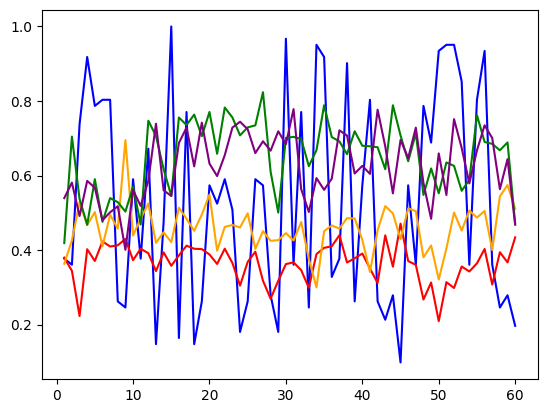

In [77]:
features=[40, 120, 200, 280, 360]
colours = ['blue', 'red', 'orange', 'green', 'purple']
temp = get_subset(user_id=2, activity_id=12, features=features)

for f, c in zip(features, colours):
    # plt.plot(temp.index, temp[f])
    plt.plot(temp.index, temp[f], color=c)
# plt.plot(temp.index, temp[200])
# plt.title("User 2 on 'ascending stairs'")
plt.show()

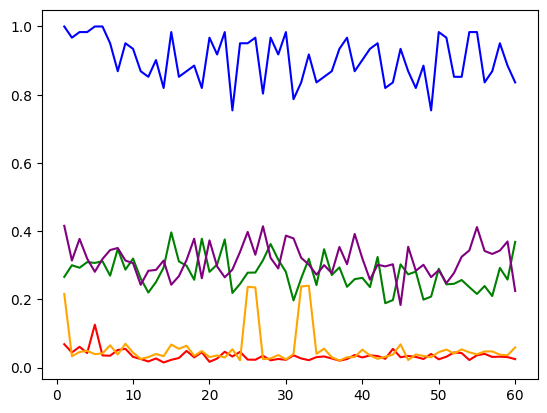

In [74]:
features=[40, 120, 200, 280, 360]
colours = ['blue', 'red', 'orange', 'green', 'purple']
temp = get_subset(user_id=2, activity_id=5, features=features)


for f, c in zip(features, colours):
    # plt.plot(temp.index, temp[f])
    plt.plot(temp.index, temp[f], color=c)
# plt.xlim(0, 200)
plt.show()

In [27]:
temp

,100,200
1,0.19005,0.215670
2,0.20374,0.033587
3,0.15890,0.045862
4,0.12521,0.049417
5,0.19090,0.039641
6,0.26597,0.041723
7,0.28143,0.065475
8,0.24943,0.038624
9,0.28610,0.070050
10,0.22412,0.043941


In [197]:
dsads_df.shape[1]

408

In [206]:

dsads_df.iloc[:, :405].describe()

,0,1,2,3,4,5,6,7,8,9,...,395,396,397,398,399,400,401,402,403,404
count,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,...,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000
mean,0.204626,0.095683,0.669925,0.055414,0.633621,0.072982,0.360428,0.204626,0.077533,0.093948,...,0.908679,0.025020,0.430250,0.590514,0.294628,0.078921,0.075418,0.083101,0.560080,0.367618
std,0.079105,0.135765,0.319517,0.094675,0.303600,0.104958,0.202665,0.079105,0.118373,0.139699,...,0.178265,0.098902,0.226510,0.167944,0.156068,0.084786,0.132552,0.135855,0.222014,0.260729
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181750,0.007144,0.517460,0.003062,0.487252,0.005326,0.197920,0.181750,0.003949,0.006262,...,0.934430,0.000027,0.259645,0.472865,0.150237,0.011759,0.004436,0.003924,0.427978,0.160193
50%,0.186915,0.054147,0.753715,0.028262,0.709755,0.043943,0.302080,0.186915,0.038153,0.044940,...,0.967210,0.002351,0.342785,0.630240,0.299895,0.053795,0.041122,0.047496,0.574975,0.321420
75%,0.198280,0.104180,0.951635,0.048909,0.908155,0.078253,0.510420,0.198280,0.085495,0.106635,...,1.000000,0.010541,0.614267,0.724573,0.396930,0.109052,0.086281,0.104155,0.719175,0.550745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [207]:
# Column 407 is the activity label (1~19). Column 408 denotes the person (1~8).
# dsads_df.iloc[:, 406:].describe()
print(dsads_df.iloc[:, 406].value_counts())
print()
print(dsads_df.iloc[:, 407].value_counts())

1.0     480
11.0    480
18.0    480
17.0    480
16.0    480
15.0    480
14.0    480
13.0    480
12.0    480
10.0    480
2.0     480
9.0     480
8.0     480
7.0     480
6.0     480
5.0     480
4.0     480
3.0     480
19.0    480
Name: 406, dtype: int64

1.0    1140
2.0    1140
3.0    1140
4.0    1140
5.0    1140
6.0    1140
7.0    1140
8.0    1140
Name: 407, dtype: int64


In [208]:
cols = [i for i in range(dsads_df.shape[1]-1)]
dsads_df = dsads_df.drop(columns=[405])
dsads_df.columns = cols
dsads_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,397,398,399,400,401,402,403,404,405,406
count,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,...,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000
mean,0.204626,0.095683,0.669925,0.055414,0.633621,0.072982,0.360428,0.204626,0.077533,0.093948,...,0.430250,0.590514,0.294628,0.078921,0.075418,0.083101,0.560080,0.367618,10.000000,4.500000
std,0.079105,0.135765,0.319517,0.094675,0.303600,0.104958,0.202665,0.079105,0.118373,0.139699,...,0.226510,0.167944,0.156068,0.084786,0.132552,0.135855,0.222014,0.260729,5.477526,2.291413
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.181750,0.007144,0.517460,0.003062,0.487252,0.005326,0.197920,0.181750,0.003949,0.006262,...,0.259645,0.472865,0.150237,0.011759,0.004436,0.003924,0.427978,0.160193,5.000000,2.750000
50%,0.186915,0.054147,0.753715,0.028262,0.709755,0.043943,0.302080,0.186915,0.038153,0.044940,...,0.342785,0.630240,0.299895,0.053795,0.041122,0.047496,0.574975,0.321420,10.000000,4.500000
75%,0.198280,0.104180,0.951635,0.048909,0.908155,0.078253,0.510420,0.198280,0.085495,0.106635,...,0.614267,0.724573,0.396930,0.109052,0.086281,0.104155,0.719175,0.550745,15.000000,6.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,8.000000


In [216]:
dsads_df[405].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19.])

In [203]:
len(cols)

408

In [9]:
pamap = scipy.io.loadmat('pamap.mat')
pamap.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data_pamap'])

In [10]:
pamap_df = pd.DataFrame(pamap['data_pamap'])
pamap_df.head()

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,-0.985865,-0.943370,-0.392865,-0.971917,-0.392865,-0.944107,-0.440860,-0.985865,-0.955370,-0.966996,...,0.194576,0.148544,-0.600225,-0.966178,-0.975980,-0.994310,-0.493846,-0.705221,1.0,1.0
1,-0.980813,-0.939876,-0.392865,-0.967848,-0.392865,-0.940120,-0.562724,-0.980813,-0.949874,-0.958106,...,0.296708,0.112212,-0.613984,-0.966956,-0.977905,-0.996659,-0.943339,-0.992864,1.0,1.0
2,-0.981071,-0.923581,-0.415095,-0.953571,-0.415095,-0.923974,-0.555556,-0.981071,-0.928253,-0.941826,...,-0.304042,0.264640,-0.348350,-0.932341,-0.917266,-0.923750,0.556087,0.362490,1.0,1.0
3,-0.980063,-0.924217,-0.415124,-0.953380,-0.415124,-0.923784,-0.448029,-0.980063,-0.930109,-0.939370,...,-0.737156,-0.347023,0.060504,-0.626389,-0.023482,0.061547,0.441436,0.205478,1.0,1.0
4,-0.981735,-0.958505,-0.415124,-0.953380,-0.084243,-0.923784,-0.354839,-0.981735,-0.967207,-0.975581,...,-0.678535,-0.257434,-0.010541,-0.697847,-0.053474,-0.287784,-0.306239,-0.739722,1.0,1.0


In [11]:
pamap_df.iloc[:, :243].describe()

,0,1,2,3,4,5,6,7,8,9,...,233,234,235,236,237,238,239,240,241,242
count,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,...,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000
mean,-0.929860,-0.812101,-0.485458,-0.831347,-0.422894,-0.797386,-0.322712,-0.929860,-0.853181,-0.864473,...,0.785582,-0.971499,-0.251062,0.029497,-0.312354,-0.854485,-0.870845,-0.863610,-0.117316,-0.381994
std,0.128977,0.241428,0.267206,0.250201,0.305605,0.259024,0.541764,0.128977,0.210045,0.207706,...,0.489994,0.087041,0.393516,0.203762,0.262623,0.148691,0.165851,0.187205,0.548278,0.493268
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.987774,-0.972602,-0.694947,-0.978938,-0.676132,-0.963351,-0.784946,-0.987774,-0.979185,-0.983883,...,0.968627,-0.999901,-0.615469,-0.107787,-0.588704,-0.960924,-0.980066,-0.996068,-0.738467,-0.901656
50%,-0.967350,-0.866160,-0.498971,-0.913520,-0.449465,-0.872484,-0.505376,-0.967350,-0.903516,-0.918299,...,1.000000,-0.997554,-0.324592,0.055112,-0.337784,-0.925652,-0.936878,-0.938486,-0.005311,-0.420733
75%,-0.928088,-0.771339,-0.230772,-0.824600,-0.086391,-0.767832,0.046595,-0.928088,-0.819192,-0.833948,...,1.000000,-0.978052,0.215625,0.181735,-0.090918,-0.773023,-0.823151,-0.799824,0.295771,-0.039192
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Column 244 is the activity label. Column 245 denotes the person (1~9).
print(pamap_df.iloc[:, 243].value_counts())
print()
print(pamap_df.iloc[:, 244].value_counts())

17.0    917
4.0     886
1.0     740
3.0     727
7.0     711
2.0     710
16.0    673
6.0     628
12.0    434
13.0    384
5.0     352
24.0    150
Name: 243, dtype: int64

5.0    1004
2.0     993
8.0     992
6.0     950
1.0     944
4.0     875
7.0     868
3.0     663
9.0      23
Name: 244, dtype: int64


In [16]:
dsads_np = dsads_df.to_numpy()
pamap_np = pamap_df.to_numpy()

In [24]:
pamap_np.shape

(7312, 245)

In [135]:
dsads_df.iloc[:, 406]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
9115    8.0
9116    8.0
9117    8.0
9118    8.0
9119    8.0
Name: 407, Length: 9120, dtype: float64

In [217]:
def split_df(df, user_col, exclude=[]):
    inside = df[~df.iloc[:, user_col].isin(exclude)]
    outside = df[df.iloc[:, user_col].isin(exclude)]    
    return inside, outside

def drop_user(df, cols=[]):
    return df.drop(columns=cols)

def to_pickle(df, class_col, name):
    X = df.iloc[:, :class_col].to_numpy()
    y = df.iloc[:, class_col].to_numpy()
    pickle.dump({'X': X, 'y': y}, open(name, 'wb'))

def to_pth(df, class_col, name):
    # data = {
    #     'data': [
    #         [
    #             768_dimension_of_ViT_embedding,
    #             the_label
    #         ],
    #         [],
    #         ...
    #     ],
    #     'targets': labels/classes as a whole
    # }
    X = df.iloc[:, :class_col].to_numpy()
    y = df.iloc[:, class_col].to_numpy()
    data = [[torch.tensor(x_, dtype=torch.float), torch.tensor(y_, dtype=torch.int)] for x_, y_ in zip(X, y)]
    targets = torch.tensor(y, dtype=torch.int)
    torch.save({'data': data, 'targets': targets}, name)
    return {'data': data, 'targets': targets}

def make(df, user_col, class_col, exclude, train_name, test_name):
    inside, outside = split_df(df, user_col, exclude)
    inside = drop_user(inside, [user_col])
    outside = drop_user(outside, [user_col])
    to_pth(inside, class_col, train_name)
    to_pth(outside, class_col, test_name)
    # to_pickle(inside, class_col, train_name)
    # to_pickle(outside, class_col, test_name)

#pamap user_col: 244, class_col: 243
# make(pamap_df, 244, 243, [1.0, 7.0], 'pamap_train1_7.pkl', 'pamap_test1_7.pkl')
# make(pamap_df, 244, 243, [1.0, 4.0], 'pamap_train1_4.pkl', 'pamap_test1_4.pkl')
make(pamap_df, 244, 243, [1.0, 7.0], 'pamap_train1_7.pth', 'pamap_test1_7.pth')
make(pamap_df, 244, 243, [1.0, 4.0], 'pamap_train1_4.pth', 'pamap_test1_4.pth')

#dsads user_col: 406, class_col: 405
# make(dsads_df, 406, 405, [1.0, 7.0], 'dsads_train1_7.pkl', 'dsads_test1_7.pkl')
# make(dsads_df, 406, 405, [1.0, 4.0], 'dsads_train1_4.pkl', 'dsads_test1_4.pkl')
make(dsads_df, 406, 405, [1.0, 7.0], 'dsads_train1_7.pth', 'dsads_test1_7.pth')
make(dsads_df, 406, 405, [1.0, 4.0], 'dsads_train1_4.pth', 'dsads_test1_4.pth')

/tmp/ipykernel_699484/2154121818.py:28: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  data = [[torch.tensor(x_, dtype=torch.float), torch.tensor(y_, dtype=torch.int)] for x_, y_ in zip(X, y)]
/tmp/ipykernel_699484/2154121818.py:28: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  data = [[torch.tensor(x_, dtype=torch.float), torch.tensor(y_, dtype=torch.int)] for x_, y_ in zip(X, y)]
/tmp/ipykernel_699484/2154121818.py:28: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  data = [[torch.tensor(x_, dtype=torch.float), torch.tensor(y_, dtype=torch.int)] for x_, y_ in zip(X, y)]
/tmp/ipykerne

In [211]:
inside, outside = split_df(dsads_df, 406, [1.0, 7.0])
inside = drop_user(inside, [406])
outside = drop_user(outside, [406])
# data = to_pth(inside, 405, 'train')
# to_pickle(inside, class_col, train_name)
# to_pickle(outside, class_col, test_name)

In [213]:
outside

,0,1,2,3,4,5,6,7,8,9,...,396,397,398,399,400,401,402,403,404,405
0,0.18159,0.001289,0.97740,0.001202,0.92034,0.002124,0.60417,0.18159,0.001110,0.001035,...,0.000001,0.86705,0.75574,0.078302,0.008801,0.000857,0.000414,0.24269,0.047526,1.0
1,0.18186,0.000961,0.97901,0.000642,0.94172,0.001493,0.57292,0.18186,0.000792,0.000812,...,0.000003,0.78944,0.75162,0.079341,0.007009,0.001376,0.000779,0.46658,0.271820,1.0
2,0.18171,0.000528,0.99120,0.000466,0.93672,0.000539,0.61458,0.18171,0.000407,0.000345,...,0.000002,0.85388,0.74650,0.074646,0.005282,0.001151,0.000368,0.18409,0.028531,1.0
3,0.18173,0.001531,0.98364,0.001466,0.93766,0.001969,0.58333,0.18173,0.001251,0.001172,...,0.000001,0.87393,0.69563,0.087227,0.009425,0.000855,0.000282,0.18788,0.027360,1.0
4,0.18147,0.000815,0.98862,0.000720,0.93724,0.000945,0.54167,0.18147,0.000586,0.000560,...,0.000002,0.79027,0.72342,0.090580,0.007176,0.000837,0.000469,0.17299,0.009971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7975,0.29533,0.187270,0.35436,0.138100,0.33367,0.171130,0.35417,0.29533,0.145930,0.140160,...,0.019883,0.26388,0.59567,0.341750,0.074560,0.101430,0.149060,0.87943,0.804590,19.0
7976,0.21228,0.074855,0.67967,0.048729,0.63999,0.066067,0.33333,0.21228,0.073388,0.071767,...,0.007225,0.20275,0.52586,0.386000,0.100020,0.050859,0.091230,0.90271,0.842140,19.0
7977,0.31649,0.244890,0.28406,0.287290,0.26748,0.315920,0.30208,0.31649,0.208870,0.201370,...,0.025904,0.24495,0.58874,0.357730,0.081012,0.108890,0.171550,0.86505,0.776110,19.0
7978,0.27772,0.195250,0.25445,0.156520,0.23960,0.194910,0.36458,0.27772,0.172000,0.170890,...,0.004168,0.13297,0.35911,0.504150,0.193650,0.042360,0.068426,0.66032,0.401560,19.0


In [172]:
data['targets']

tensor([2, 2, 2,  ..., 8, 8, 8], dtype=torch.int32)

In [139]:
a = pickle.load(open('pamap_train1_4.pkl', 'rb'))
a['X'].shape

(5493, 243)

In [148]:
a = pickle.load(open('dsads_train1_7.pkl', 'rb'))
a['X'].shape

(6840, 405)

In [154]:
torch.tensor(a['y'], dtype=torch.int32)

tensor([2, 2, 2,  ..., 8, 8, 8], dtype=torch.int32)

In [99]:
y = inside1_7.iloc[:, :243].to_numpy()
y

array([[-0.98814217, -0.99884408, -0.09494342, ..., -0.9986814 ,
        -0.92796786, -0.98629975],
       [-0.98797125, -0.99841391, -0.09717891, ..., -0.99884775,
        -0.9367385 , -0.98800375],
       [-0.97590222, -0.93055327, -0.45035708, ..., -0.44337285,
         0.23144592, -0.17178196],
       ...,
       [-0.82242948, -0.54285584, -0.89186083, ..., -0.97972457,
        -0.33613807, -0.73459599],
       [-0.68690473, -0.4024731 , -0.89186083, ..., -0.97252905,
        -0.19683684, -0.59592818],
       [-0.63955215, -0.21124738, -0.93529933, ..., -0.96403396,
         0.35114474,  0.09886887]])

In [81]:
inside[244].value_counts()

5.0    1004
2.0     993
8.0     992
6.0     950
4.0     875
3.0     663
9.0      23
Name: 244, dtype: int64

In [75]:
print(sorted(inside[243].unique()), len(inside[243].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 12.0, 13.0, 16.0, 17.0, 24.0] 12


In [76]:
print(sorted(outside[243].unique()), len(outside[243].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 12.0, 13.0, 16.0, 17.0, 24.0] 12


In [77]:
print(inside.shape)
print(inside[243].value_counts())
print()
print(outside.shape)
print(outside[243].value_counts())

(5500, 245)
17.0    714
4.0     680
2.0     574
3.0     545
1.0     536
7.0     525
16.0    502
6.0     451
12.0    309
13.0    287
5.0     273
24.0    104
Name: 243, dtype: int64

(1812, 245)
4.0     206
1.0     204
17.0    203
7.0     186
3.0     182
6.0     177
16.0    171
2.0     136
12.0    125
13.0     97
5.0      79
24.0     46
Name: 243, dtype: int64


In [34]:
train, test = train_test_split(pamap_df, test_size=0.2, stratify=pamap_df[244])

In [45]:
train[243].value_counts()

17.0    741
4.0     712
1.0     579
3.0     579
2.0     576
7.0     573
16.0    545
6.0     487
12.0    350
13.0    314
5.0     275
24.0    118
Name: 243, dtype: int64

In [36]:
train[244].value_counts()

5.0    803
8.0    794
2.0    794
6.0    760
1.0    755
4.0    700
7.0    694
3.0    530
9.0     19
Name: 244, dtype: int64

In [30]:
test[244].value_counts()

5.0    215
8.0    194
4.0    191
6.0    188
1.0    184
2.0    184
7.0    157
3.0    145
9.0      5
Name: 244, dtype: int64

In [43]:
pamap = torch.load("pamap_test1_4.pth")
pamap_clsidx = {v: k for k, v in enumerate(set(pamap["targets"].numpy()))}
pamap["targets"] = torch.tensor(np.vectorize(pamap_clsidx.get)(pamap["targets"].numpy())).type(torch.int)

for data in pamap["data"]:
    data[1] = torch.tensor(pamap_clsidx[data[1].item()], dtype=torch.int)

torch.save(pamap, "pamap_")


In [58]:
def class_reindex(train_pth, test_pth, file_prefix):
    # file_prefix: dsads1_4, pamap1_4
    train = torch.load(train_pth)
    train_clsidx = {v: k for k, v in enumerate(set(train["targets"].numpy()))}
    train["targets"] = torch.tensor(np.vectorize(train_clsidx.get)(train["targets"].numpy()), dtype=torch.int)

    for data in train["data"]:
        data[1] = torch.tensor(train_clsidx[data[1].item()], dtype=torch.int)

    torch.save(train, f"{file_prefix}_train_mapped.pth")

    test = torch.load(test_pth)
    test["targets"] = torch.tensor(np.vectorize(train_clsidx.get)(test["targets"].numpy()), dtype=torch.int)

    for data in test["data"]:
        data[1] = torch.tensor(train_clsidx[data[1].item()], dtype=torch.int)

    torch.save(test, f"{file_prefix}_test_mapped.pth")



In [68]:
train_path = ["pamap_train1_4.pth", "pamap_train1_7.pth", "dsads_train1_4.pth", "dsads_train1_7.pth"]
test_path = ["pamap_test1_4.pth", "pamap_test1_7.pth", "dsads_test1_4.pth", "dsads_test1_7.pth"]

class_reindex(train_path[3], test_path[3], "dsads1_7")

In [70]:
pamap = torch.load("dsads1_4_train_mapped.pth")
print(len(pamap["targets"]), len(pamap["data"]))
pamap = torch.load("dsads1_4_test_mapped.pth")
print(len(pamap["targets"]), len(pamap["data"]))

6840 6840
2280 2280


In [11]:
pamap["targets"]

tensor([1, 1, 1,  ..., 6, 6, 6], dtype=torch.int32)

In [10]:
pamap["data"][0]

[tensor([-0.9859, -0.9434, -0.3929, -0.9719, -0.3929, -0.9441, -0.4409, -0.9859,
         -0.9554, -0.9670, -0.9670, -0.9713, -0.9713,  0.9681, -0.9162,  0.9158,
         -0.8637,  0.7333, -0.9982, -0.3493, -0.1317, -0.1491, -0.6120, -0.9442,
         -0.9424, -0.6921, -0.9366, -0.8044, -0.7946, -0.9806, -0.8834, -0.9806,
         -0.8805, -0.8156, -0.8044, -0.8600, -0.8691, -0.8691, -0.8359, -0.8359,
          0.9920, -1.0000,  1.0000, -0.9960,  0.9922, -0.9780, -0.3748,  0.0016,
         -0.3576, -0.7994, -0.7548, -0.8053, -0.2788, -0.6309, -0.3941, -0.9524,
         -0.3289, -0.4289, -0.3548, -0.9431, -0.8146, -0.3941, -0.9758, -0.9634,
         -0.9634, -0.9412, -0.9412,  0.9921, -0.9961,  0.9961, -1.0000,  1.0000,
         -0.9984,  0.2363,  0.6056, -0.7312, -0.9804, -0.9462, -0.9499,  0.6849,
          0.5507, -0.9114, -0.9937,  0.8943, -0.9908,  0.1837, -0.9901, -0.1029,
         -0.9114, -0.9962, -0.9967, -0.9967, -0.9955, -0.9955,  0.8669, -0.8508,
          0.8429, -0.8938,  

In [37]:
pamap["data"][0][1] = torch.tensor(pamap_clsidx[pamap["data"][0][1].item()], dtype=torch.int)
pamap["data"][0]

[tensor([-0.9859, -0.9434, -0.3929, -0.9719, -0.3929, -0.9441, -0.4409, -0.9859,
         -0.9554, -0.9670, -0.9670, -0.9713, -0.9713,  0.9681, -0.9162,  0.9158,
         -0.8637,  0.7333, -0.9982, -0.3493, -0.1317, -0.1491, -0.6120, -0.9442,
         -0.9424, -0.6921, -0.9366, -0.8044, -0.7946, -0.9806, -0.8834, -0.9806,
         -0.8805, -0.8156, -0.8044, -0.8600, -0.8691, -0.8691, -0.8359, -0.8359,
          0.9920, -1.0000,  1.0000, -0.9960,  0.9922, -0.9780, -0.3748,  0.0016,
         -0.3576, -0.7994, -0.7548, -0.8053, -0.2788, -0.6309, -0.3941, -0.9524,
         -0.3289, -0.4289, -0.3548, -0.9431, -0.8146, -0.3941, -0.9758, -0.9634,
         -0.9634, -0.9412, -0.9412,  0.9921, -0.9961,  0.9961, -1.0000,  1.0000,
         -0.9984,  0.2363,  0.6056, -0.7312, -0.9804, -0.9462, -0.9499,  0.6849,
          0.5507, -0.9114, -0.9937,  0.8943, -0.9908,  0.1837, -0.9901, -0.1029,
         -0.9114, -0.9962, -0.9967, -0.9967, -0.9955, -0.9955,  0.8669, -0.8508,
          0.8429, -0.8938,  

In [15]:
pamap_clsidx = {v: k for k, v in enumerate(set(pamap["targets"].numpy()))}
pamap_clsidx

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 12: 7, 13: 8, 16: 9, 17: 10, 24: 11}

In [25]:
# pamap_cls = pamap["targets"].numpy()



In [27]:
a = torch.tensor(1, dtype=torch.int)
print(a.dtype)

pamap_cls[0].dtype

torch.int32


torch.int32